In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = False

# Image
from PIL import Image
import cv2

# deep learning
import tensorflow as tf
from tensorflow.keras import applications, optimizers
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CWD is  /content


In [ ]:
# Data Paths
train_dir = '/content/drive/MyDrive/data_skintone'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Constants
IMG_SIZE = 224

# Function to visualize images
def visualize_imgs(data_dir, pts_per_class):
    classes = ['dark', 'light', 'mid-dark','mid-light']
    images = []
    labels = []

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        image_files = np.random.choice(os.listdir(class_dir), pts_per_class, replace=False)
        for img_file in image_files:
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)

    plt.figure(figsize=(15, pts_per_class*5))
    for i, img in enumerate(images):
        plt.subplot(pts_per_class, len(classes), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

In [ ]:
visualize_imgs(train_dir, 3)
visualize_imgs(train_dir, 2)

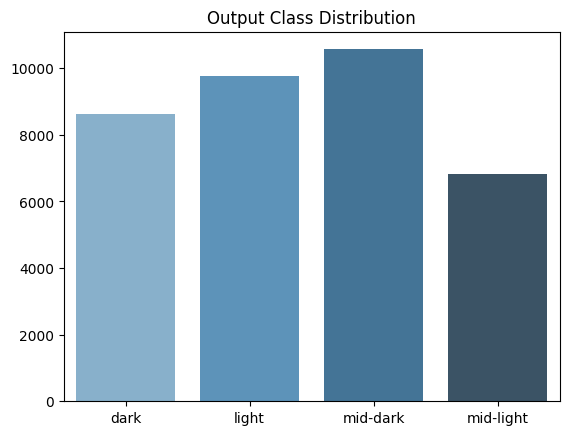

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Constants
IMG_SIZE = 224

# Function to visualize data
def plot_classes(train_dir):
    classes = ['dark', 'light', 'mid-dark','mid-light']
    class_counts = [len(os.listdir(os.path.join(train_dir, c))) for c in classes]
    sns.barplot(x=classes, y=class_counts, palette="Blues_d")
    plt.title('Output Class Distribution')
    plt.show()

plot_classes(train_dir)

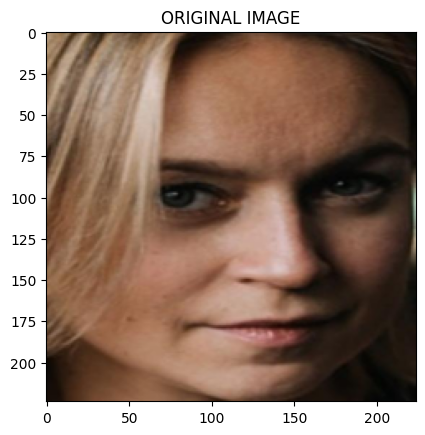

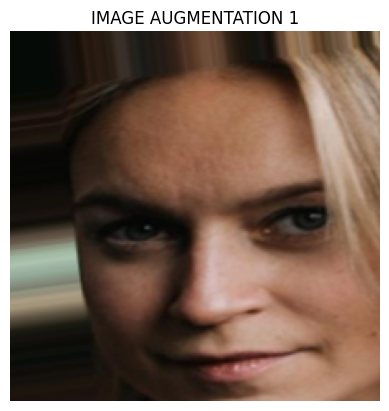

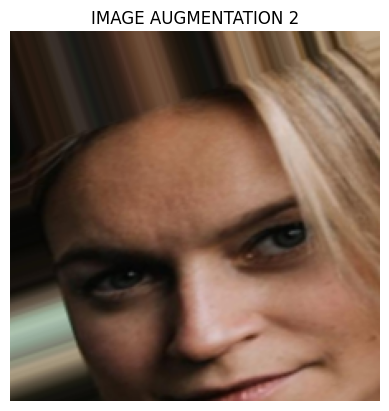

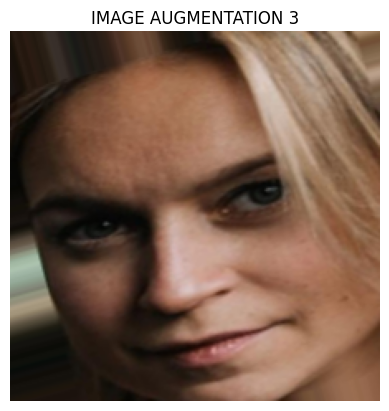

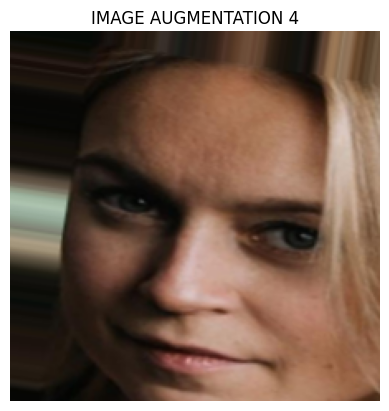

In [ ]:
# img augmentation
def generate_augmentations(lim):
  datagen = ImageDataGenerator(featurewise_center=True,
                               featurewise_std_normalization = True,
                               rotation_range = 20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip=True)
  classes = ['dark', 'light', 'mid-dark','mid-light']
  label = np.random.choice(classes)
  img_path = os.path.join(train_dir, label, np.random.choice(os.listdir(os.path.join(train_dir, label))))

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
  plt.imshow(img)
  plt.title('ORIGINAL IMAGE')
  plt.show()

  img_arr = img.reshape((1,) + img.shape)

  i = 0

  for img_iterator in datagen.flow(x=img_arr, batch_size=1):
    i += 1
    if i > lim: # Indentation corrected here
      break
    plt.imshow((img_iterator[0]).astype(np.uint8))
    plt.title('IMAGE AUGMENTATION ' + str(i)) # Indentation corrected here
    plt.axis('off')
    plt.show()

generate_augmentations(4)

In [ ]:
# fine-tune
# parameters
EPOCHS = 50
LR = 0.1
STEP = 15
GAMMA = 0.1
BATCH = 128
OUT_CLASSES = 3
IMG_SIZE = 224

In [ ]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

Found 35818 images belonging to 4 classes.


In [ ]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Training
history = model.fit(
    train_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 6372s 22s/step - accuracy: 0.5997 - loss: 0.9396
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 207s 723ms/step - accuracy: 0.8221 - loss: 0.4184
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 206s 717ms/step - accuracy: 0.8676 - loss: 0.3104
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 206s 716ms/step - accuracy: 0.8935 - loss: 0.2462
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 201s 701ms/step - accuracy: 0.9142 - loss: 0.2012
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 223s 780ms/step - accuracy: 0.9255 - loss: 0.1733
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 262s 781ms/step - accuracy: 0.9401 - loss: 0.1464
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 202s 700ms/step - accuracy: 0.9540 - loss: 0.1142
Epoch 9/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 196s 685ms/step - accuracy: 0.9623 - loss: 0.1014
Epoch 10/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 197s 686ms/step - accuracy: 0.9711 - loss: 0.0775
Epoch 11/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 203s 694ms/step - accuracy: 0.9757 - loss: 0.0657
Epoch 12/

In [ ]:
# Save the model
model.save('/content/drive/My Drive/skin_tone_model.h5')